# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

Refer to [here](http://cs231n.github.io/neural-networks-1/).

In [1]:
# A bit of setup

from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.794120407794253e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 3.865039e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738423e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.01714960793873202


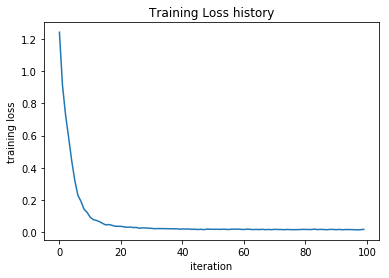

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [9]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = np.mean(net.predict(X_val) == y_val)
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

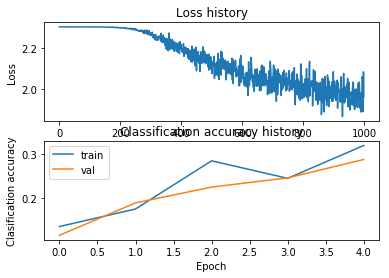

In [10]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

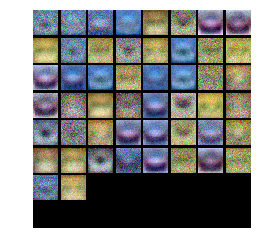

In [11]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

Training process took 9.819872s.
hs 50 lr 2.000000e-04 reg 1.000000e-05


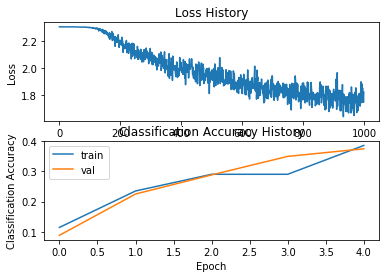



Training process took 8.112390s.
hs 50 lr 2.000000e-04 reg 1.000000e-04


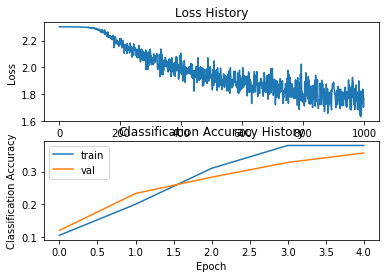



Training process took 8.738439s.
hs 50 lr 2.000000e-04 reg 5.000000e-04


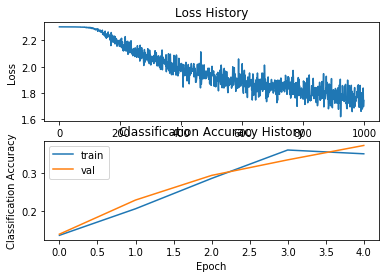



Training process took 8.310336s.
hs 50 lr 2.000000e-04 reg 1.000000e-03


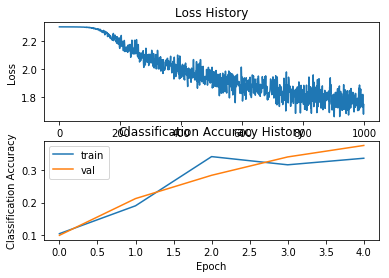



Training process took 8.243196s.
hs 50 lr 2.000000e-04 reg 5.000000e-03


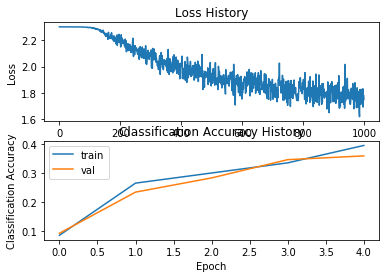



Training process took 8.521484s.
hs 50 lr 2.000000e-04 reg 1.000000e-02


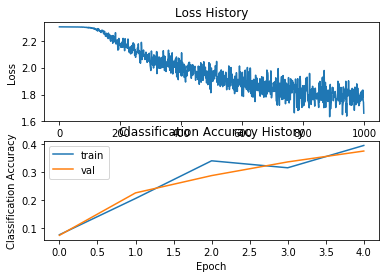



Training process took 8.084356s.
hs 50 lr 2.000000e-04 reg 2.500000e-01


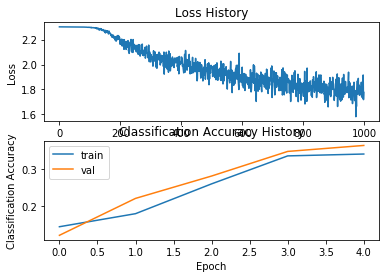



Training process took 7.716180s.
hs 50 lr 2.000000e-04 reg 5.000000e-01


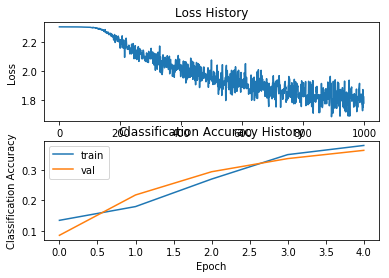



Training process took 7.171768s.
hs 50 lr 5.000000e-04 reg 1.000000e-05


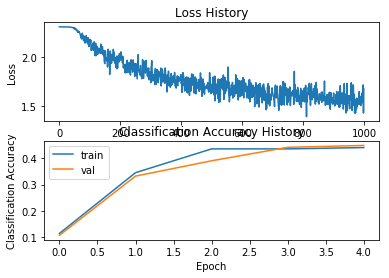



Training process took 7.259551s.
hs 50 lr 5.000000e-04 reg 1.000000e-04


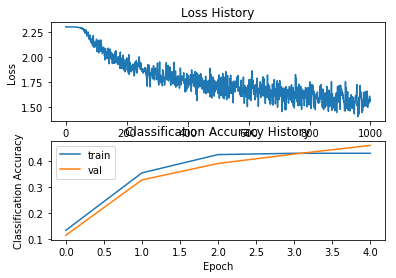



Training process took 7.174550s.
hs 50 lr 5.000000e-04 reg 5.000000e-04


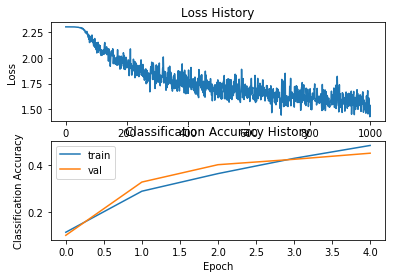



Training process took 7.204631s.
hs 50 lr 5.000000e-04 reg 1.000000e-03


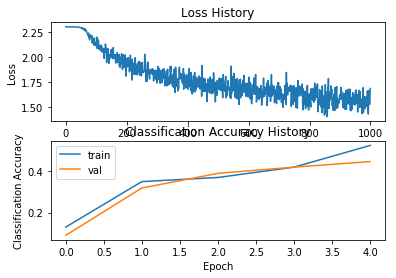



Training process took 7.212958s.
hs 50 lr 5.000000e-04 reg 5.000000e-03


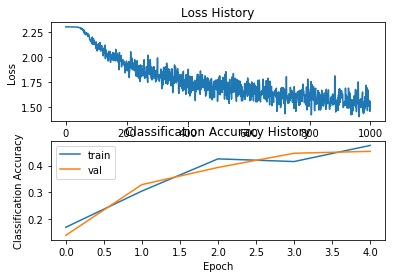



Training process took 7.170972s.
hs 50 lr 5.000000e-04 reg 1.000000e-02


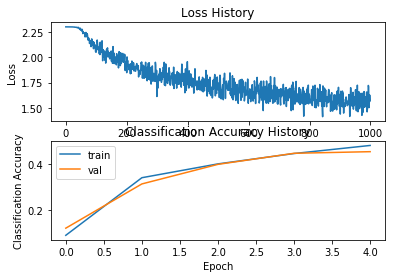



Training process took 7.165286s.
hs 50 lr 5.000000e-04 reg 2.500000e-01


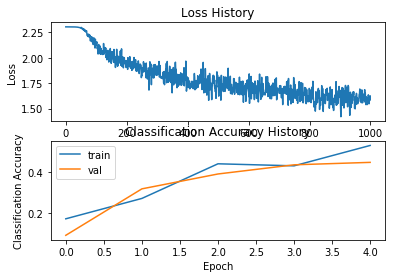



Training process took 7.291511s.
hs 50 lr 5.000000e-04 reg 5.000000e-01


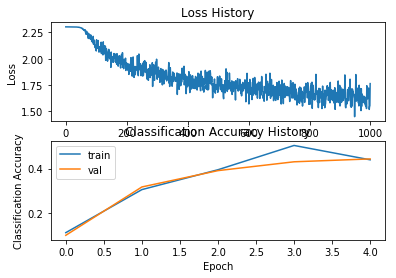



Training process took 7.261768s.
hs 50 lr 1.000000e-03 reg 1.000000e-05


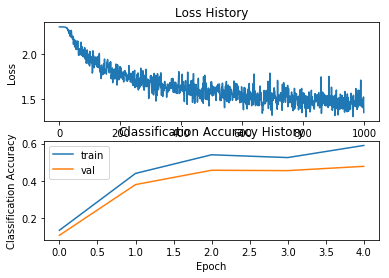



Training process took 7.150121s.
hs 50 lr 1.000000e-03 reg 1.000000e-04


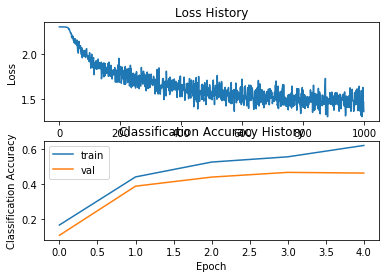



Training process took 7.131193s.
hs 50 lr 1.000000e-03 reg 5.000000e-04


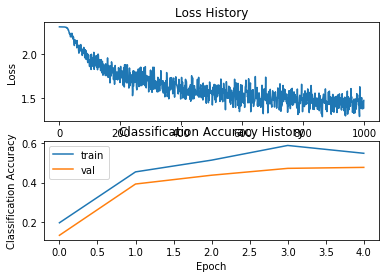



Training process took 7.206538s.
hs 50 lr 1.000000e-03 reg 1.000000e-03


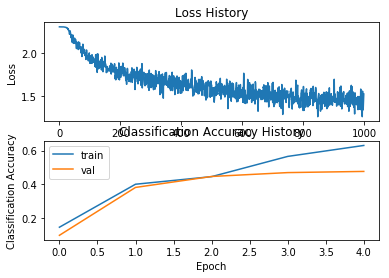



Training process took 7.863128s.
hs 50 lr 1.000000e-03 reg 5.000000e-03


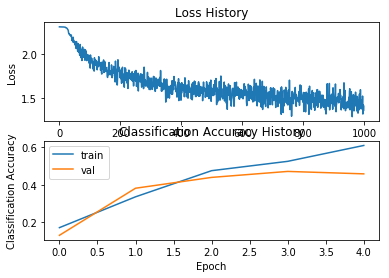



Training process took 7.174046s.
hs 50 lr 1.000000e-03 reg 1.000000e-02


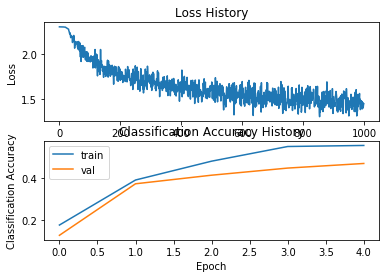



Training process took 7.218606s.
hs 50 lr 1.000000e-03 reg 2.500000e-01


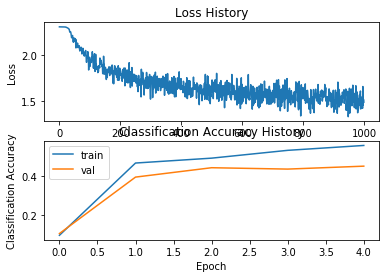



Training process took 7.439449s.
hs 50 lr 1.000000e-03 reg 5.000000e-01


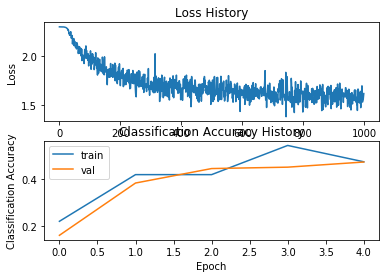



Training process took 7.291620s.
hs 50 lr 5.000000e-03 reg 1.000000e-05


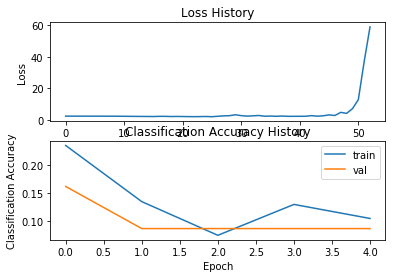



Training process took 7.180558s.
hs 50 lr 5.000000e-03 reg 1.000000e-04


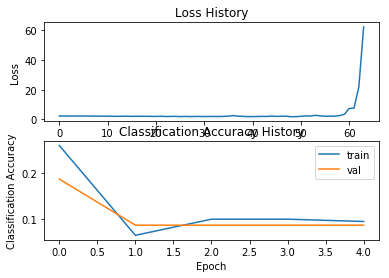



Training process took 7.227414s.
hs 50 lr 5.000000e-03 reg 5.000000e-04


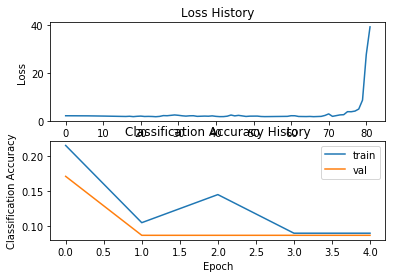



Training process took 7.233395s.
hs 50 lr 5.000000e-03 reg 1.000000e-03


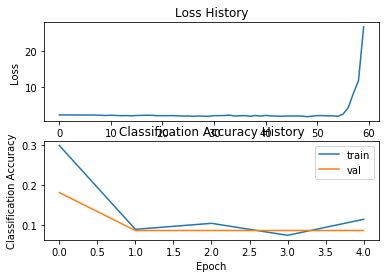



Training process took 7.190489s.
hs 50 lr 5.000000e-03 reg 5.000000e-03


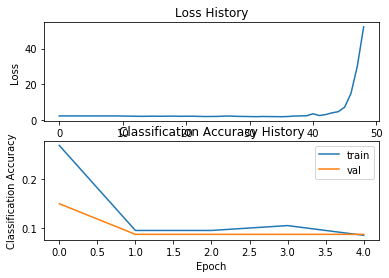



Training process took 7.098567s.
hs 50 lr 5.000000e-03 reg 1.000000e-02


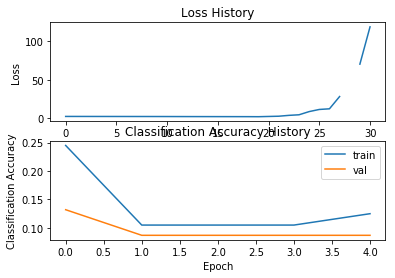



Training process took 7.222800s.
hs 50 lr 5.000000e-03 reg 2.500000e-01


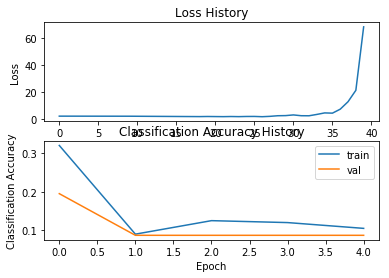



Training process took 7.147101s.
hs 50 lr 5.000000e-03 reg 5.000000e-01


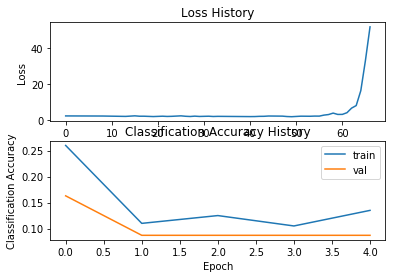



Training process took 10.699202s.
hs 75 lr 2.000000e-04 reg 1.000000e-05


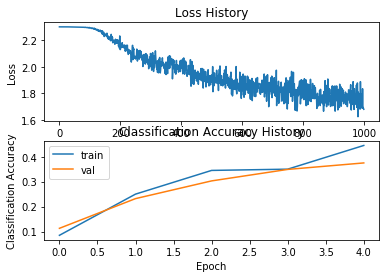



Training process took 10.640320s.
hs 75 lr 2.000000e-04 reg 1.000000e-04


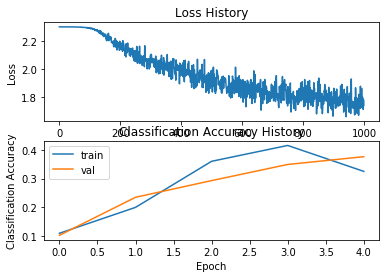



Training process took 9.749893s.
hs 75 lr 2.000000e-04 reg 5.000000e-04


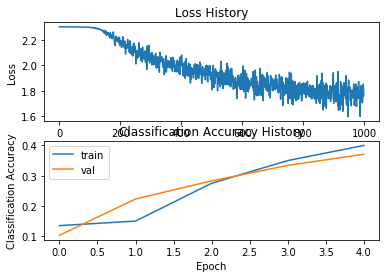



Training process took 9.379621s.
hs 75 lr 2.000000e-04 reg 1.000000e-03


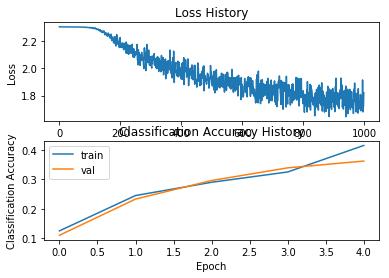



Training process took 9.630355s.
hs 75 lr 2.000000e-04 reg 5.000000e-03


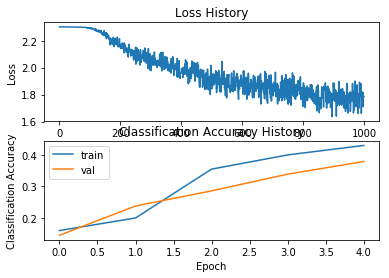



Training process took 9.410001s.
hs 75 lr 2.000000e-04 reg 1.000000e-02


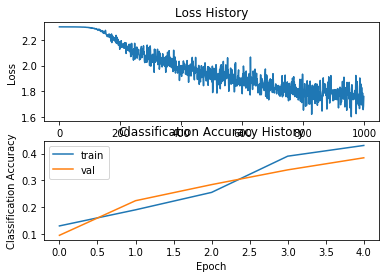



Training process took 9.313647s.
hs 75 lr 2.000000e-04 reg 2.500000e-01


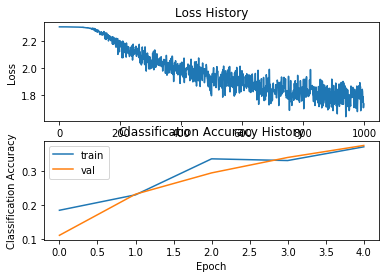



Training process took 9.353828s.
hs 75 lr 2.000000e-04 reg 5.000000e-01


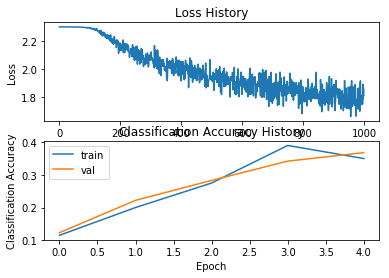



Training process took 10.197211s.
hs 75 lr 5.000000e-04 reg 1.000000e-05


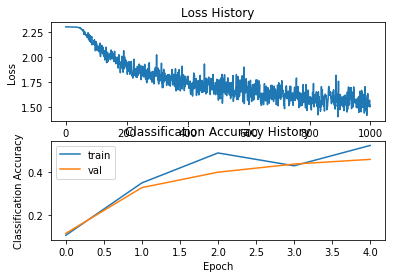



Training process took 9.355092s.
hs 75 lr 5.000000e-04 reg 1.000000e-04


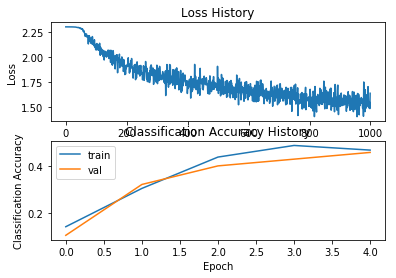



Training process took 9.442312s.
hs 75 lr 5.000000e-04 reg 5.000000e-04


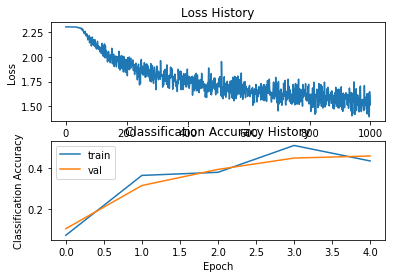



Training process took 9.428470s.
hs 75 lr 5.000000e-04 reg 1.000000e-03


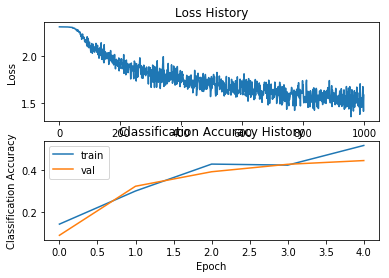



Training process took 9.359764s.
hs 75 lr 5.000000e-04 reg 5.000000e-03


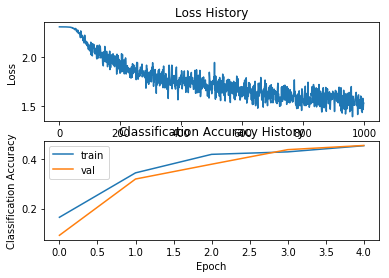



Training process took 9.593687s.
hs 75 lr 5.000000e-04 reg 1.000000e-02


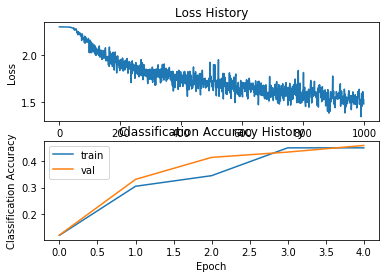



Training process took 9.887288s.
hs 75 lr 5.000000e-04 reg 2.500000e-01


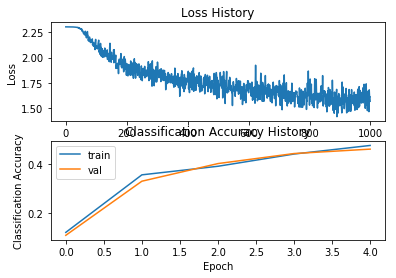



Training process took 9.282002s.
hs 75 lr 5.000000e-04 reg 5.000000e-01


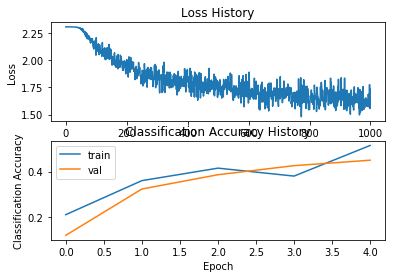



Training process took 9.329295s.
hs 75 lr 1.000000e-03 reg 1.000000e-05


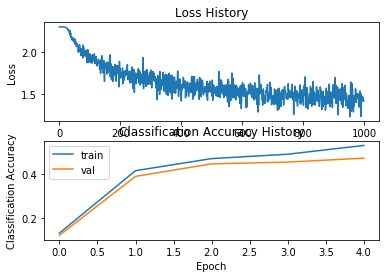



Training process took 9.425378s.
hs 75 lr 1.000000e-03 reg 1.000000e-04


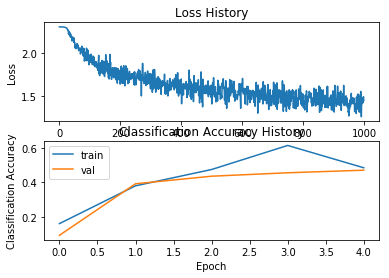



Training process took 9.588080s.
hs 75 lr 1.000000e-03 reg 5.000000e-04


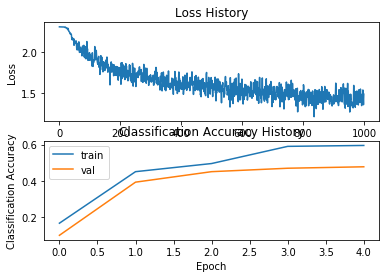



Training process took 9.911593s.
hs 75 lr 1.000000e-03 reg 1.000000e-03


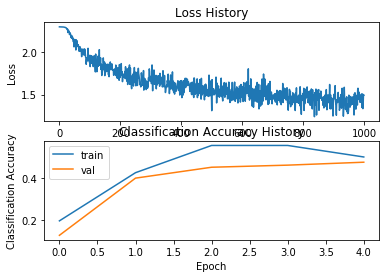



Training process took 9.487938s.
hs 75 lr 1.000000e-03 reg 5.000000e-03


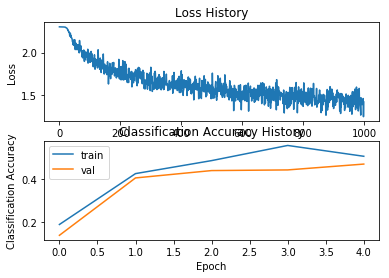



Training process took 9.362895s.
hs 75 lr 1.000000e-03 reg 1.000000e-02


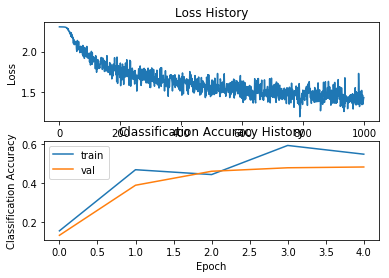



Training process took 9.387388s.
hs 75 lr 1.000000e-03 reg 2.500000e-01


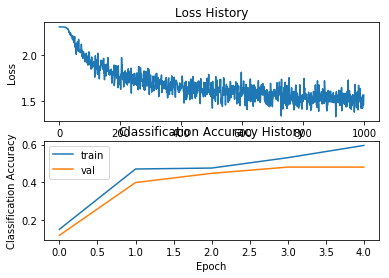



Training process took 9.297523s.
hs 75 lr 1.000000e-03 reg 5.000000e-01


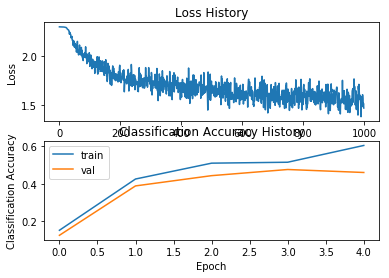



Training process took 9.226014s.
hs 75 lr 5.000000e-03 reg 1.000000e-05


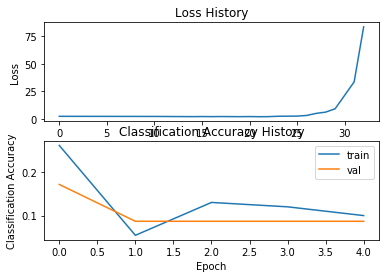



Training process took 9.206289s.
hs 75 lr 5.000000e-03 reg 1.000000e-04


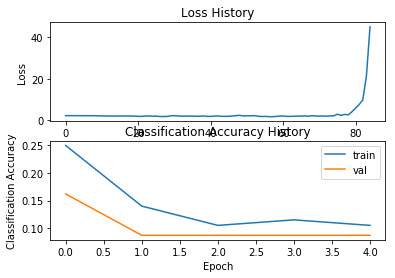



Training process took 9.740966s.
hs 75 lr 5.000000e-03 reg 5.000000e-04


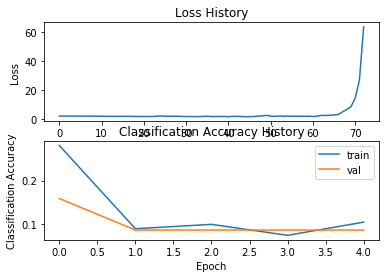



Training process took 9.239386s.
hs 75 lr 5.000000e-03 reg 1.000000e-03


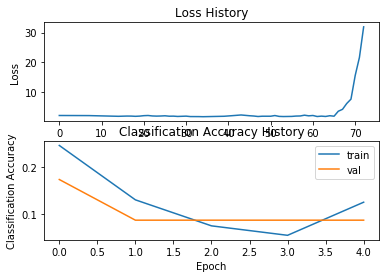



Training process took 9.269825s.
hs 75 lr 5.000000e-03 reg 5.000000e-03


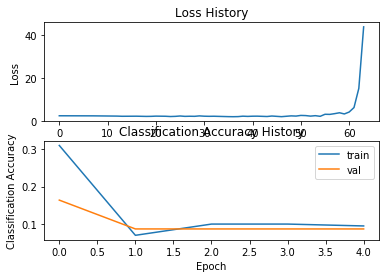



Training process took 9.304311s.
hs 75 lr 5.000000e-03 reg 1.000000e-02


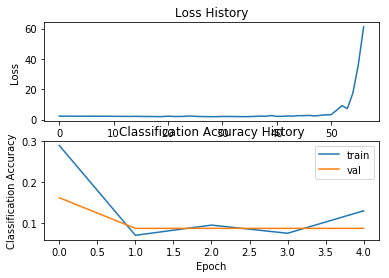



Training process took 9.298515s.
hs 75 lr 5.000000e-03 reg 2.500000e-01


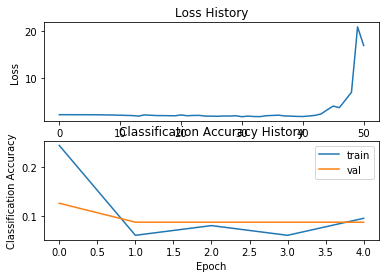



Training process took 10.187619s.
hs 75 lr 5.000000e-03 reg 5.000000e-01


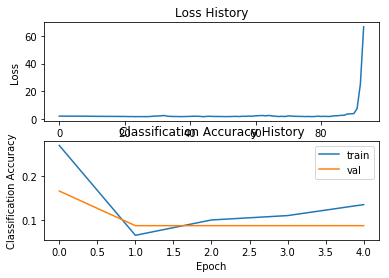



Training process took 13.067433s.
hs 100 lr 2.000000e-04 reg 1.000000e-05


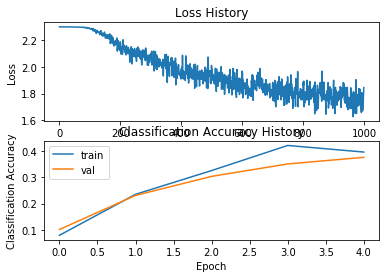



Training process took 13.303075s.
hs 100 lr 2.000000e-04 reg 1.000000e-04


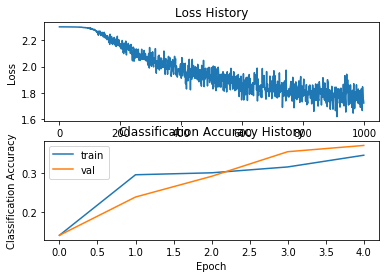



Training process took 13.268683s.
hs 100 lr 2.000000e-04 reg 5.000000e-04


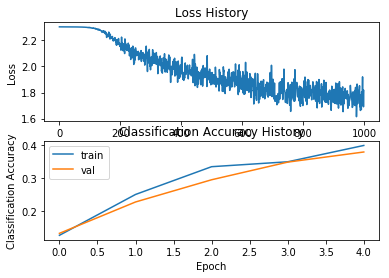



Training process took 13.904049s.
hs 100 lr 2.000000e-04 reg 1.000000e-03


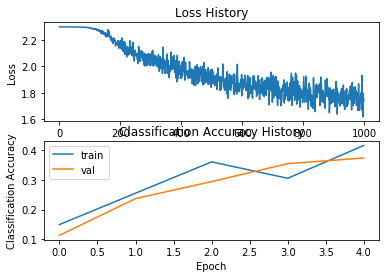



Training process took 13.536260s.
hs 100 lr 2.000000e-04 reg 5.000000e-03


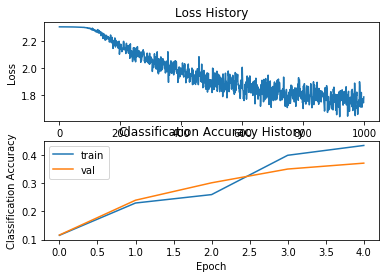



Training process took 13.405038s.
hs 100 lr 2.000000e-04 reg 1.000000e-02


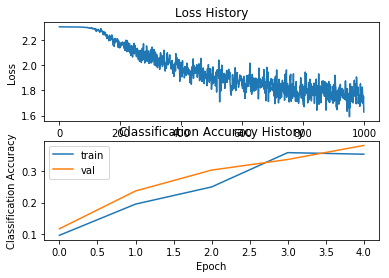



Training process took 12.484635s.
hs 100 lr 2.000000e-04 reg 2.500000e-01


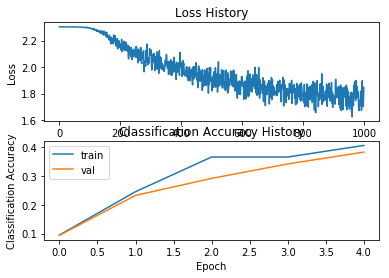



Training process took 12.738469s.
hs 100 lr 2.000000e-04 reg 5.000000e-01


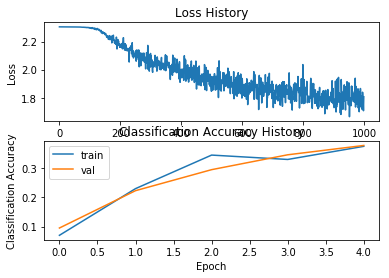



Training process took 12.245978s.
hs 100 lr 5.000000e-04 reg 1.000000e-05


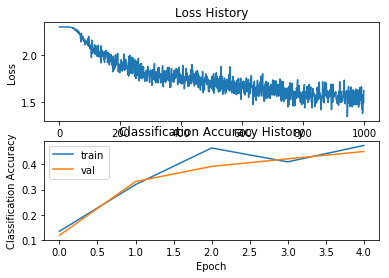



Training process took 11.915314s.
hs 100 lr 5.000000e-04 reg 1.000000e-04


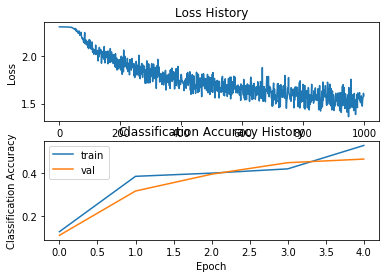



Training process took 35.751981s.
hs 100 lr 5.000000e-04 reg 5.000000e-04


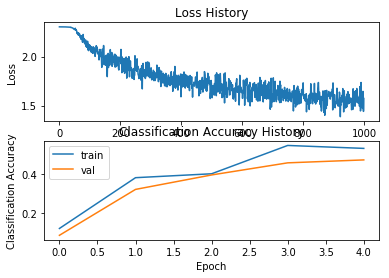



Training process took 12.838946s.
hs 100 lr 5.000000e-04 reg 1.000000e-03


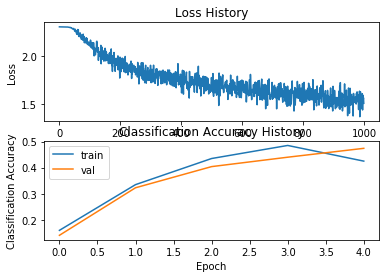



Training process took 13.291323s.
hs 100 lr 5.000000e-04 reg 5.000000e-03


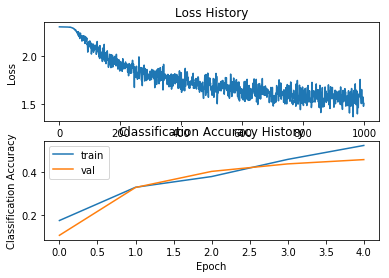



Training process took 703.433438s.
hs 100 lr 5.000000e-04 reg 1.000000e-02


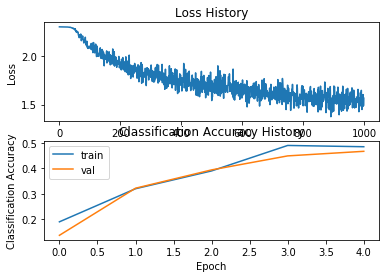



Training process took 17.725722s.
hs 100 lr 5.000000e-04 reg 2.500000e-01


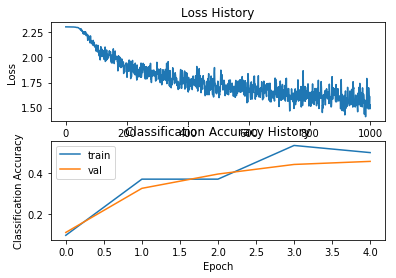



Training process took 17.742962s.
hs 100 lr 5.000000e-04 reg 5.000000e-01


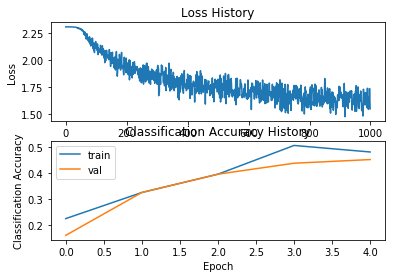



Training process took 14.029136s.
hs 100 lr 1.000000e-03 reg 1.000000e-05


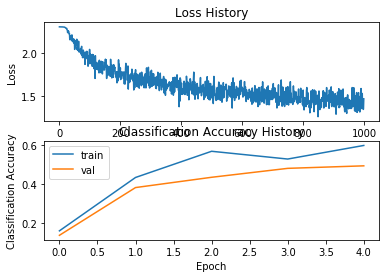



Training process took 20.778608s.
hs 100 lr 1.000000e-03 reg 1.000000e-04


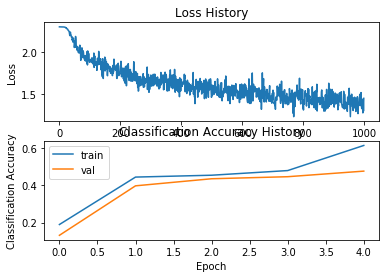



Training process took 24.767736s.
hs 100 lr 1.000000e-03 reg 5.000000e-04


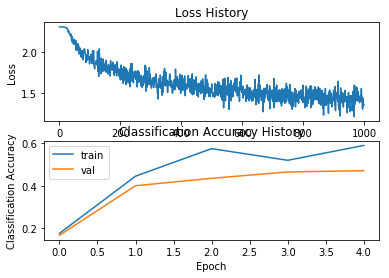



Training process took 20.075761s.
hs 100 lr 1.000000e-03 reg 1.000000e-03


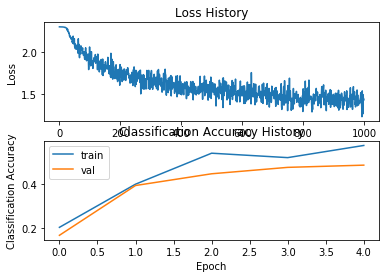



Training process took 15.654613s.
hs 100 lr 1.000000e-03 reg 5.000000e-03


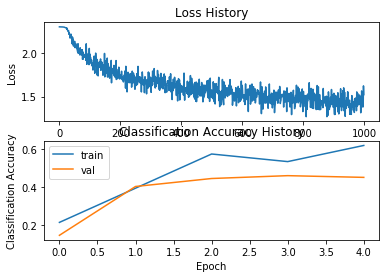



Training process took 15.390191s.
hs 100 lr 1.000000e-03 reg 1.000000e-02


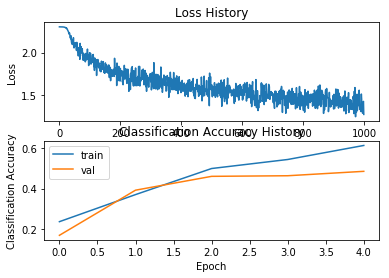



Training process took 15.755034s.
hs 100 lr 1.000000e-03 reg 2.500000e-01


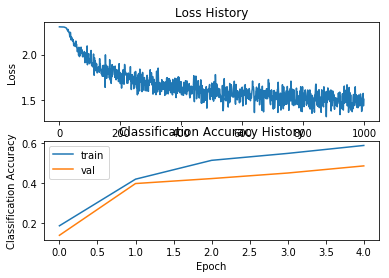



Training process took 15.887116s.
hs 100 lr 1.000000e-03 reg 5.000000e-01


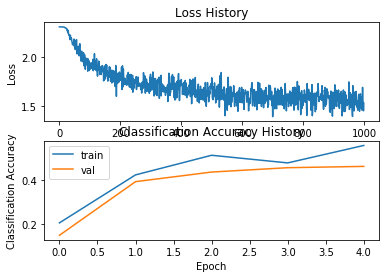



Training process took 15.310251s.
hs 100 lr 5.000000e-03 reg 1.000000e-05


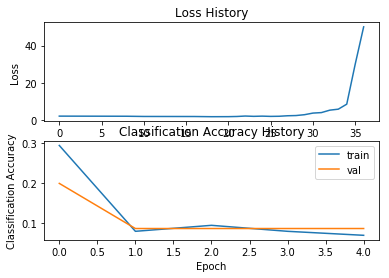



Training process took 16.054938s.
hs 100 lr 5.000000e-03 reg 1.000000e-04


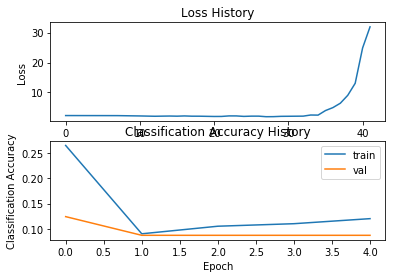



Training process took 15.211792s.
hs 100 lr 5.000000e-03 reg 5.000000e-04


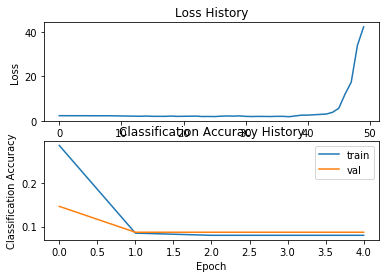



Training process took 15.859324s.
hs 100 lr 5.000000e-03 reg 1.000000e-03


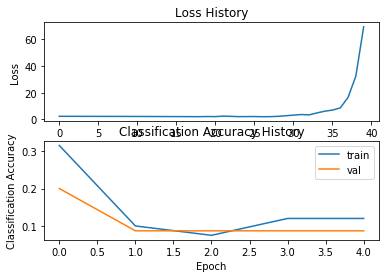



Training process took 15.669893s.
hs 100 lr 5.000000e-03 reg 5.000000e-03


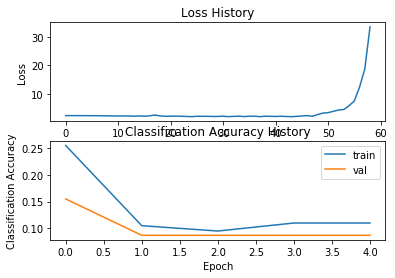



Training process took 15.209319s.
hs 100 lr 5.000000e-03 reg 1.000000e-02


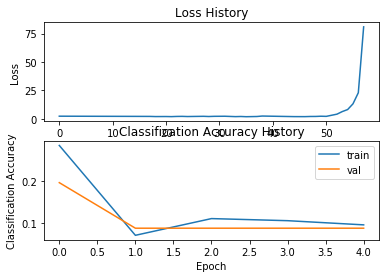



Training process took 15.907286s.
hs 100 lr 5.000000e-03 reg 2.500000e-01


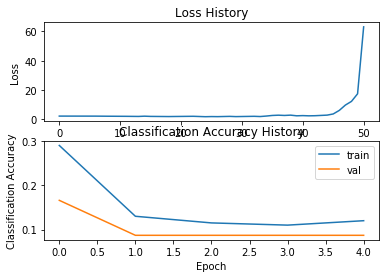



Training process took 15.718043s.
hs 100 lr 5.000000e-03 reg 5.000000e-01


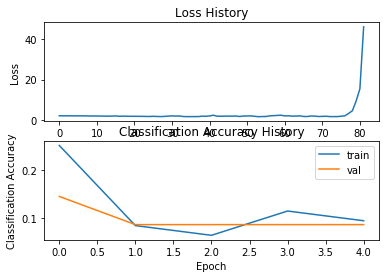



Training process took 21.299409s.
hs 125 lr 2.000000e-04 reg 1.000000e-05


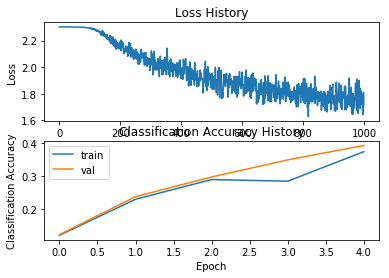



Training process took 20.799098s.
hs 125 lr 2.000000e-04 reg 1.000000e-04


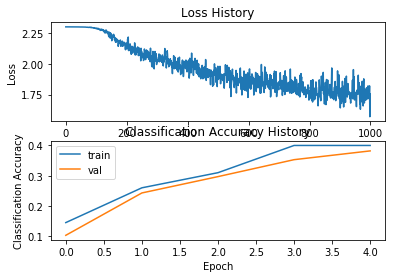



Training process took 50.098596s.
hs 125 lr 2.000000e-04 reg 5.000000e-04


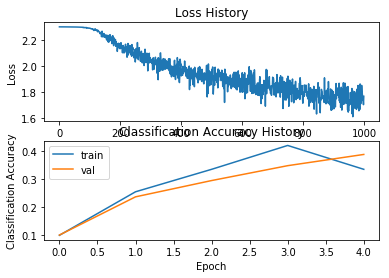



Training process took 88.444244s.
hs 125 lr 2.000000e-04 reg 1.000000e-03


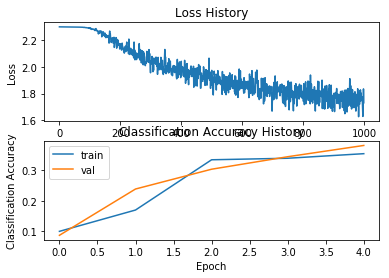



Training process took 92.047254s.
hs 125 lr 2.000000e-04 reg 5.000000e-03


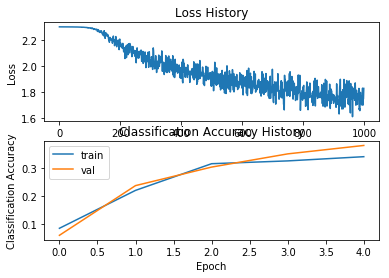



Training process took 98.404324s.
hs 125 lr 2.000000e-04 reg 1.000000e-02


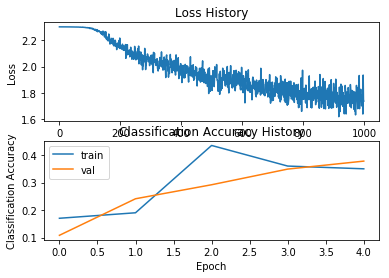



Training process took 84.281186s.
hs 125 lr 2.000000e-04 reg 2.500000e-01


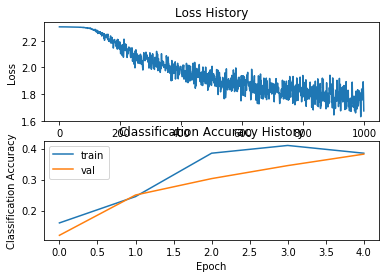



Training process took 86.470919s.
hs 125 lr 2.000000e-04 reg 5.000000e-01


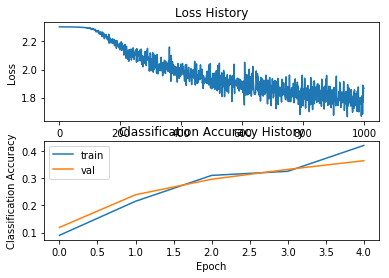



Training process took 86.457081s.
hs 125 lr 5.000000e-04 reg 1.000000e-05


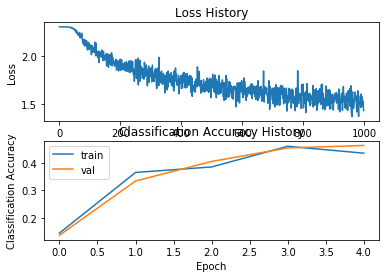



Training process took 103.119794s.
hs 125 lr 5.000000e-04 reg 1.000000e-04


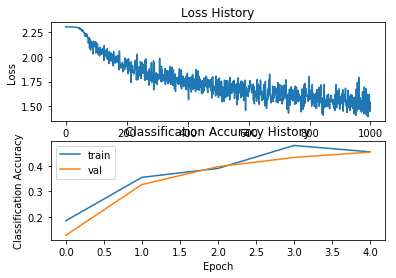



Training process took 104.381464s.
hs 125 lr 5.000000e-04 reg 5.000000e-04


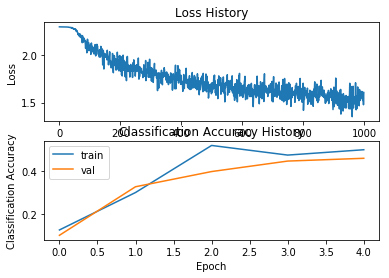



Training process took 97.395456s.
hs 125 lr 5.000000e-04 reg 1.000000e-03


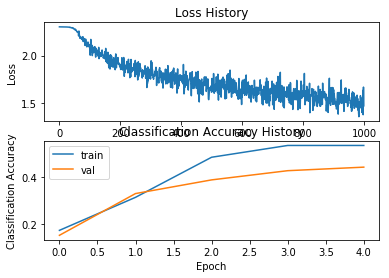



Training process took 90.494511s.
hs 125 lr 5.000000e-04 reg 5.000000e-03


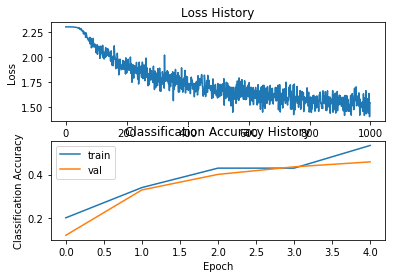



Training process took 87.684114s.
hs 125 lr 5.000000e-04 reg 1.000000e-02


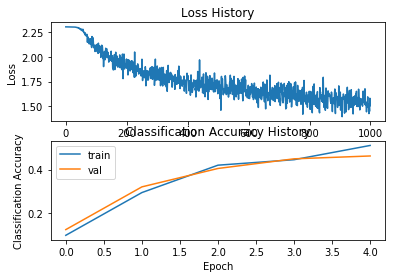



Training process took 87.715289s.
hs 125 lr 5.000000e-04 reg 2.500000e-01


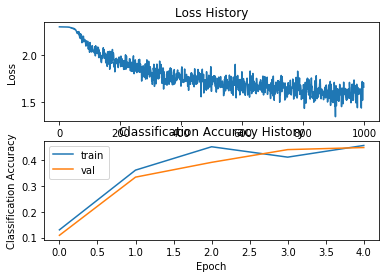



Training process took 89.630647s.
hs 125 lr 5.000000e-04 reg 5.000000e-01


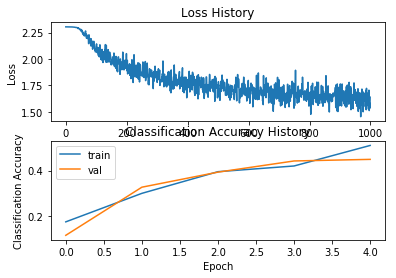



Training process took 85.522811s.
hs 125 lr 1.000000e-03 reg 1.000000e-05


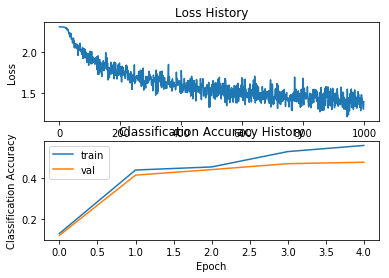



Training process took 2319.129443s.
hs 125 lr 1.000000e-03 reg 1.000000e-04


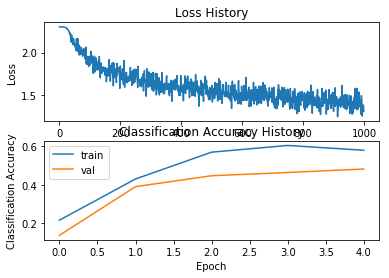



Training process took 19.111088s.
hs 125 lr 1.000000e-03 reg 5.000000e-04


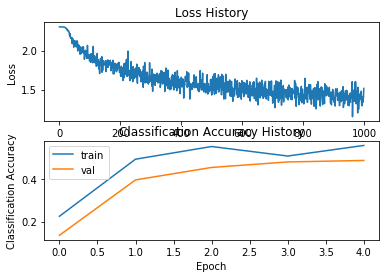



Training process took 22.715693s.
hs 125 lr 1.000000e-03 reg 1.000000e-03


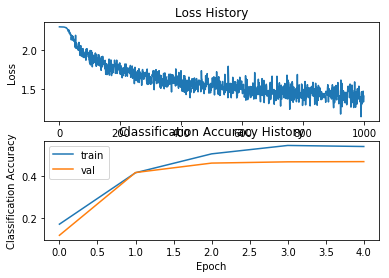



Training process took 20.365083s.
hs 125 lr 1.000000e-03 reg 5.000000e-03


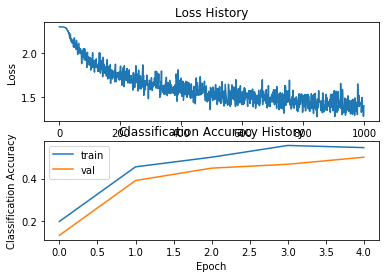



Training process took 20.363092s.
hs 125 lr 1.000000e-03 reg 1.000000e-02


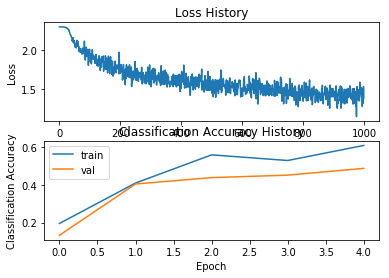



Training process took 19.528041s.
hs 125 lr 1.000000e-03 reg 2.500000e-01


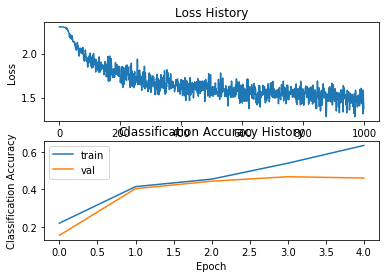



Training process took 19.971535s.
hs 125 lr 1.000000e-03 reg 5.000000e-01


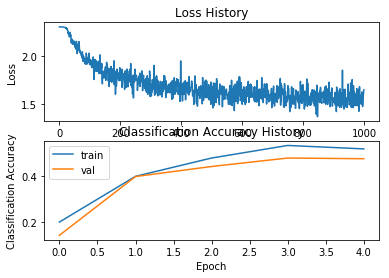



Training process took 19.605479s.
hs 125 lr 5.000000e-03 reg 1.000000e-05


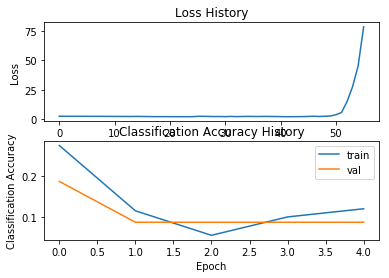



Training process took 19.932547s.
hs 125 lr 5.000000e-03 reg 1.000000e-04


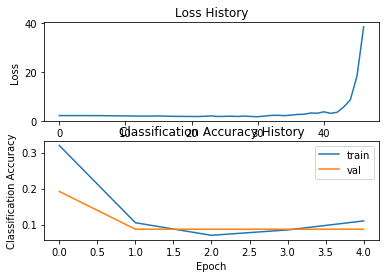



Training process took 19.931409s.
hs 125 lr 5.000000e-03 reg 5.000000e-04


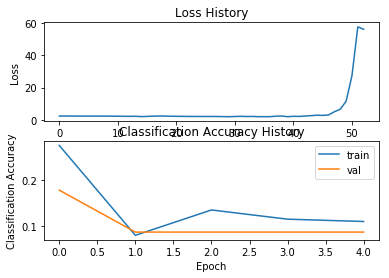



Training process took 19.540270s.
hs 125 lr 5.000000e-03 reg 1.000000e-03


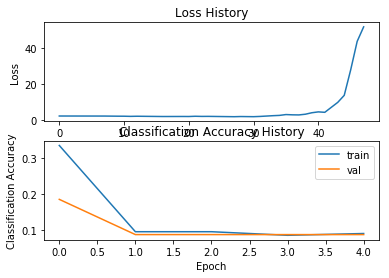



Training process took 19.460716s.
hs 125 lr 5.000000e-03 reg 5.000000e-03


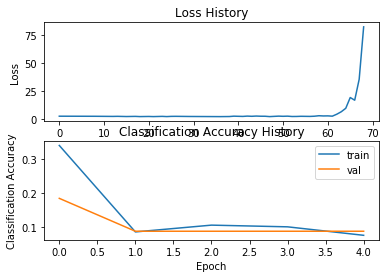



Training process took 19.640911s.
hs 125 lr 5.000000e-03 reg 1.000000e-02


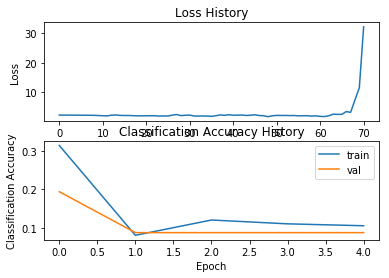



Training process took 19.791183s.
hs 125 lr 5.000000e-03 reg 2.500000e-01


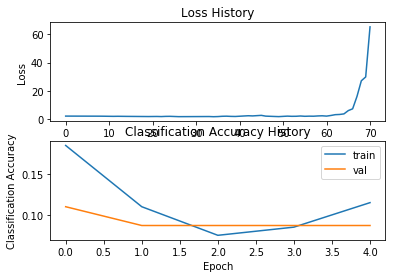



Training process took 21.167838s.
hs 125 lr 5.000000e-03 reg 5.000000e-01


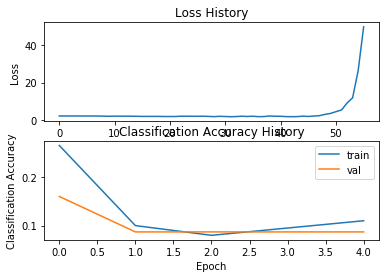



Training process took 24.342365s.
hs 150 lr 2.000000e-04 reg 1.000000e-05


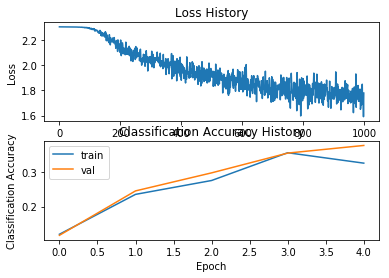



Training process took 24.612864s.
hs 150 lr 2.000000e-04 reg 1.000000e-04


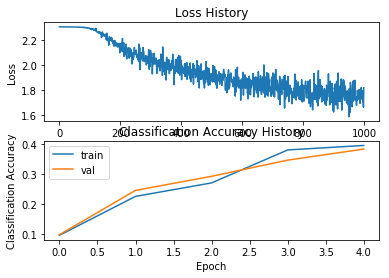



Training process took 23.687446s.
hs 150 lr 2.000000e-04 reg 5.000000e-04


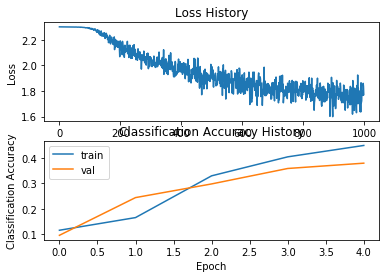



Training process took 27.588693s.
hs 150 lr 2.000000e-04 reg 1.000000e-03


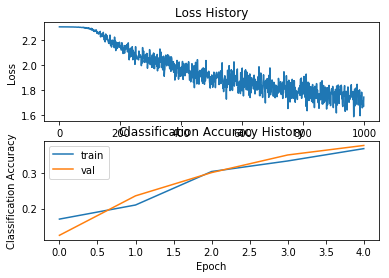



Training process took 26.361454s.
hs 150 lr 2.000000e-04 reg 5.000000e-03


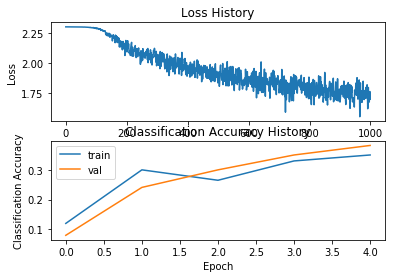



Training process took 23.582012s.
hs 150 lr 2.000000e-04 reg 1.000000e-02


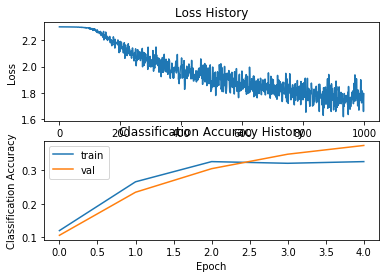



Training process took 24.293205s.
hs 150 lr 2.000000e-04 reg 2.500000e-01


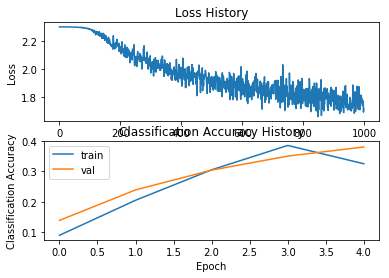



Training process took 39.760377s.
hs 150 lr 2.000000e-04 reg 5.000000e-01


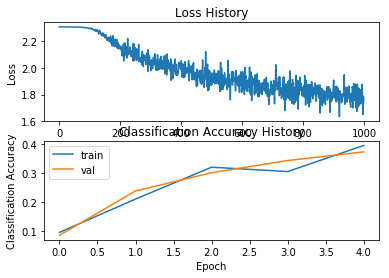



Training process took 100.318705s.
hs 150 lr 5.000000e-04 reg 1.000000e-05


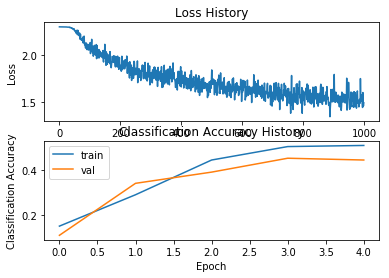



Training process took 106.920909s.
hs 150 lr 5.000000e-04 reg 1.000000e-04


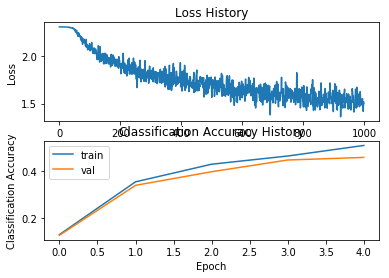



Training process took 100.002014s.
hs 150 lr 5.000000e-04 reg 5.000000e-04


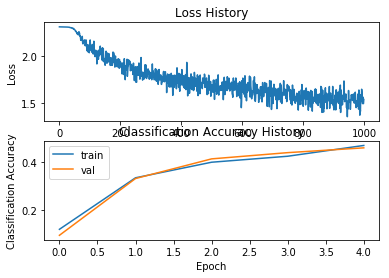



Training process took 101.446528s.
hs 150 lr 5.000000e-04 reg 1.000000e-03


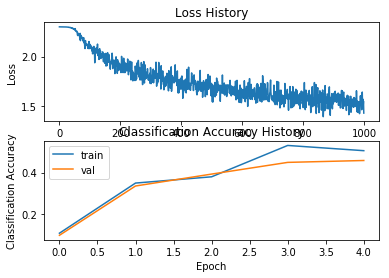



Training process took 100.354612s.
hs 150 lr 5.000000e-04 reg 5.000000e-03


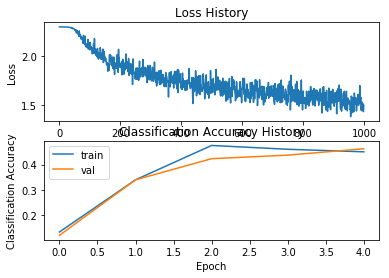



Training process took 100.079397s.
hs 150 lr 5.000000e-04 reg 1.000000e-02


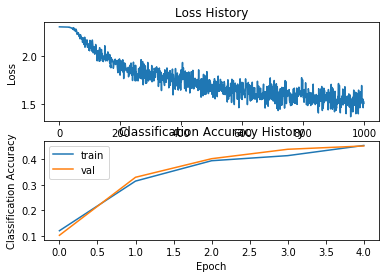



Training process took 108.034033s.
hs 150 lr 5.000000e-04 reg 2.500000e-01


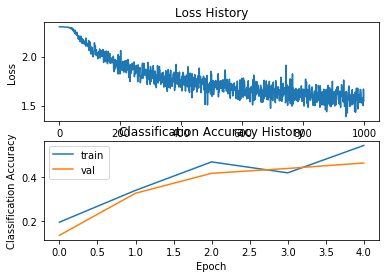



Training process took 100.076047s.
hs 150 lr 5.000000e-04 reg 5.000000e-01


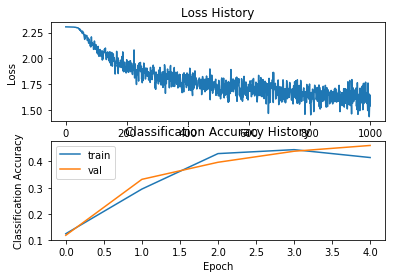



Training process took 98.360742s.
hs 150 lr 1.000000e-03 reg 1.000000e-05


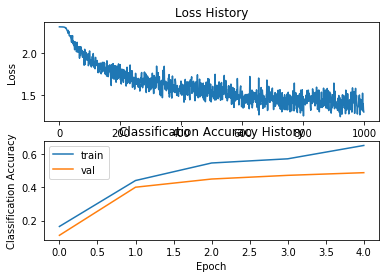



Training process took 96.731153s.
hs 150 lr 1.000000e-03 reg 1.000000e-04


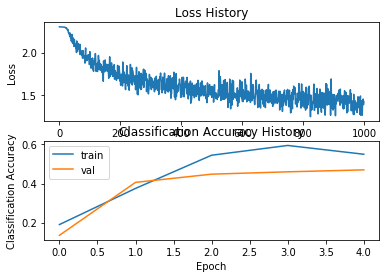



Training process took 96.970499s.
hs 150 lr 1.000000e-03 reg 5.000000e-04


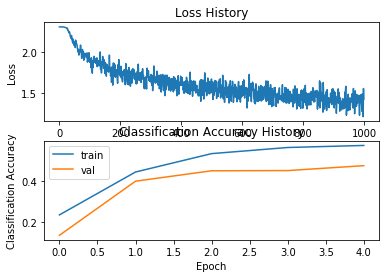



Training process took 2368.455946s.
hs 150 lr 1.000000e-03 reg 1.000000e-03


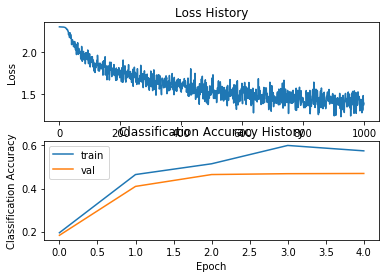



Training process took 26.098693s.
hs 150 lr 1.000000e-03 reg 5.000000e-03


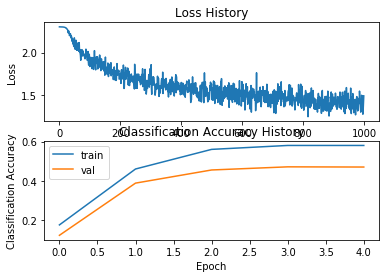



Training process took 24.570647s.
hs 150 lr 1.000000e-03 reg 1.000000e-02


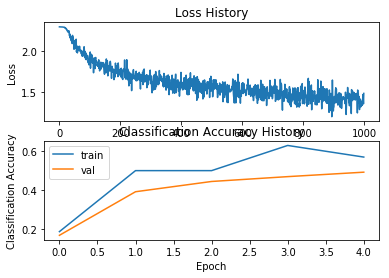



Training process took 23.388968s.
hs 150 lr 1.000000e-03 reg 2.500000e-01


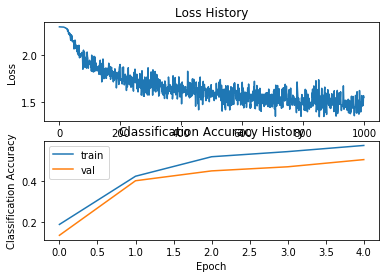



Training process took 22.708034s.
hs 150 lr 1.000000e-03 reg 5.000000e-01


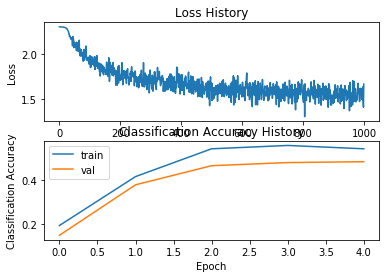



Training process took 21.675623s.
hs 150 lr 5.000000e-03 reg 1.000000e-05


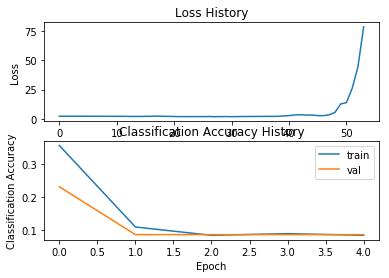



Training process took 21.625499s.
hs 150 lr 5.000000e-03 reg 1.000000e-04


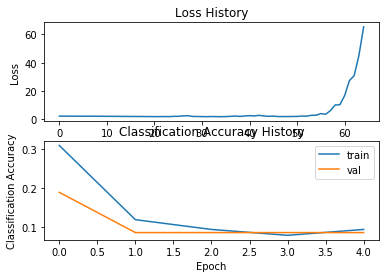



Training process took 23.414776s.
hs 150 lr 5.000000e-03 reg 5.000000e-04


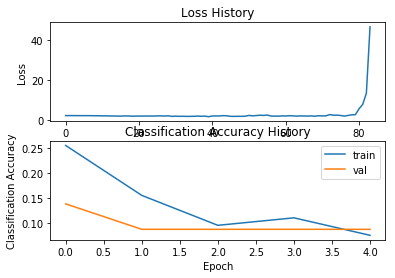



Training process took 21.506950s.
hs 150 lr 5.000000e-03 reg 1.000000e-03


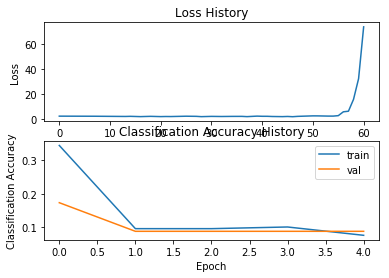



Training process took 21.840329s.
hs 150 lr 5.000000e-03 reg 5.000000e-03


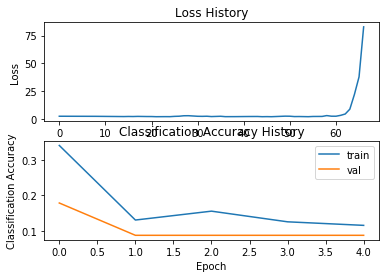



Training process took 21.636370s.
hs 150 lr 5.000000e-03 reg 1.000000e-02


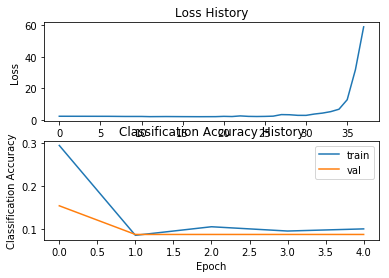



Training process took 21.728776s.
hs 150 lr 5.000000e-03 reg 2.500000e-01


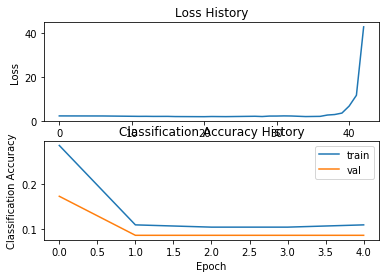



Training process took 23.336413s.
hs 150 lr 5.000000e-03 reg 5.000000e-01


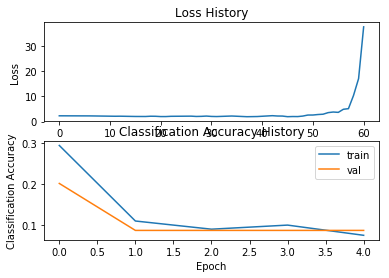



Training process took 29.373757s.
hs 200 lr 2.000000e-04 reg 1.000000e-05


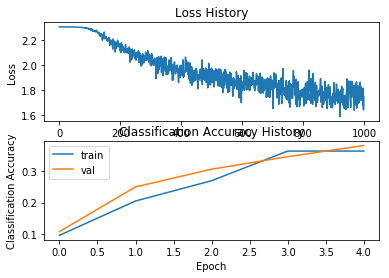



Training process took 30.672129s.
hs 200 lr 2.000000e-04 reg 1.000000e-04


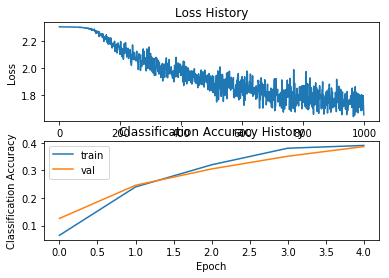



Training process took 32.422252s.
hs 200 lr 2.000000e-04 reg 5.000000e-04


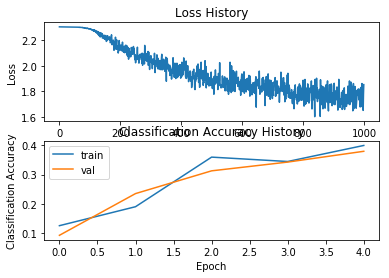



Training process took 36.635366s.
hs 200 lr 2.000000e-04 reg 1.000000e-03


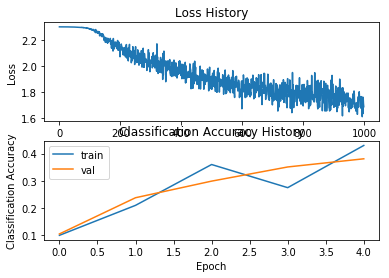



Training process took 31.059312s.
hs 200 lr 2.000000e-04 reg 5.000000e-03


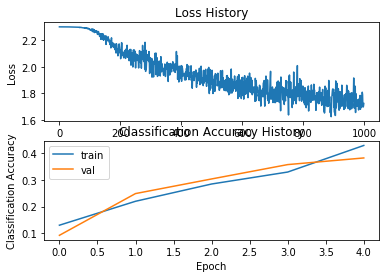



Training process took 31.278310s.
hs 200 lr 2.000000e-04 reg 1.000000e-02


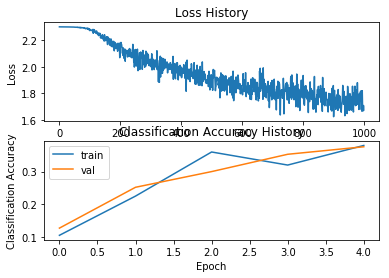



Training process took 32.855042s.
hs 200 lr 2.000000e-04 reg 2.500000e-01


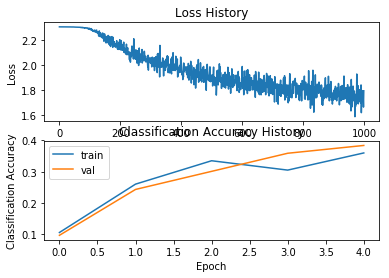



Training process took 97.112570s.
hs 200 lr 2.000000e-04 reg 5.000000e-01


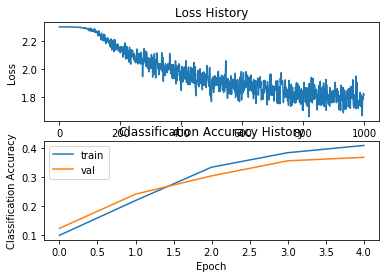



Training process took 143.764354s.
hs 200 lr 5.000000e-04 reg 1.000000e-05


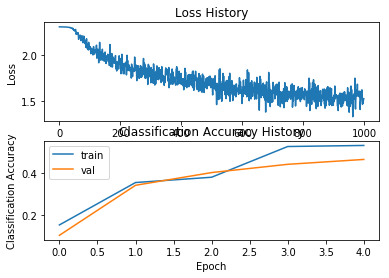



Training process took 140.959093s.
hs 200 lr 5.000000e-04 reg 1.000000e-04


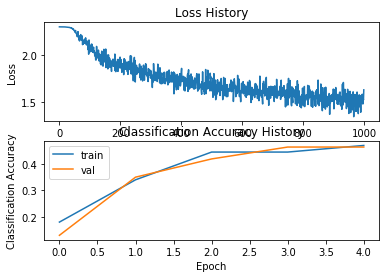



Training process took 134.509399s.
hs 200 lr 5.000000e-04 reg 5.000000e-04


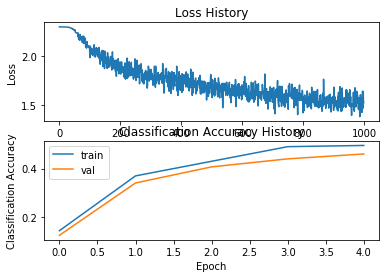



Training process took 132.944696s.
hs 200 lr 5.000000e-04 reg 1.000000e-03


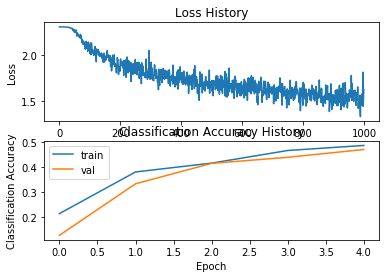



Training process took 134.658410s.
hs 200 lr 5.000000e-04 reg 5.000000e-03


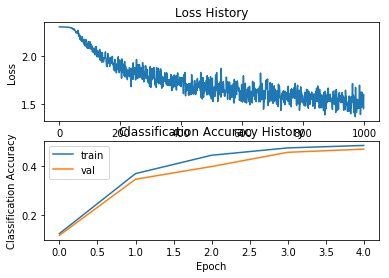



Training process took 134.261093s.
hs 200 lr 5.000000e-04 reg 1.000000e-02


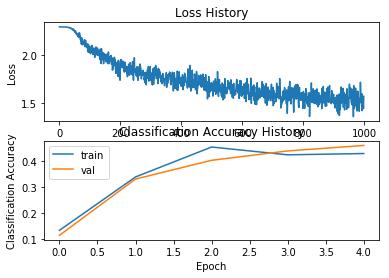



Training process took 130.343107s.
hs 200 lr 5.000000e-04 reg 2.500000e-01


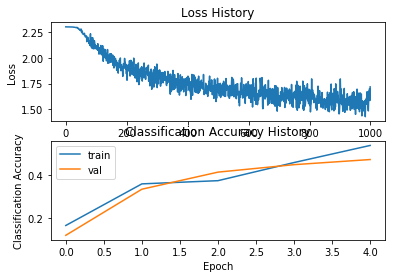



Training process took 133.246929s.
hs 200 lr 5.000000e-04 reg 5.000000e-01


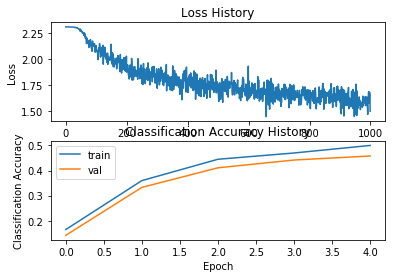



Training process took 1938.286943s.
hs 200 lr 1.000000e-03 reg 1.000000e-05


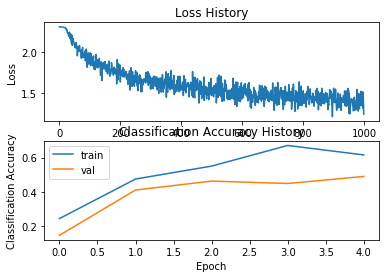



Training process took 32.140017s.
hs 200 lr 1.000000e-03 reg 1.000000e-04


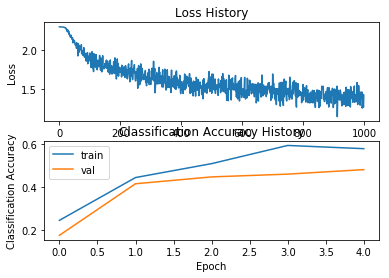



Training process took 29.602838s.
hs 200 lr 1.000000e-03 reg 5.000000e-04


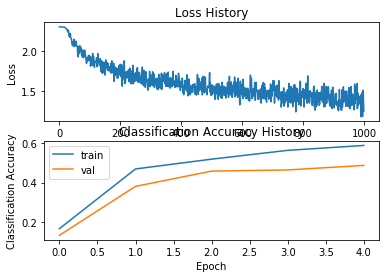



Training process took 29.249022s.
hs 200 lr 1.000000e-03 reg 1.000000e-03


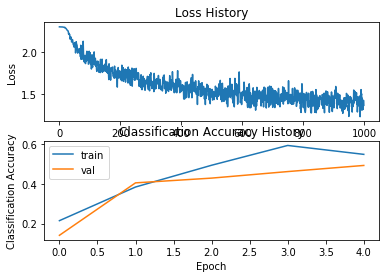



Training process took 30.226818s.
hs 200 lr 1.000000e-03 reg 5.000000e-03


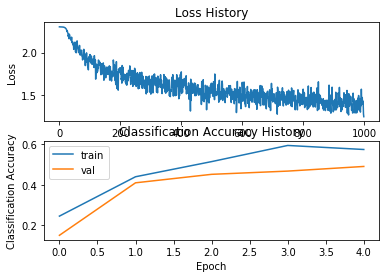



Training process took 30.447485s.
hs 200 lr 1.000000e-03 reg 1.000000e-02


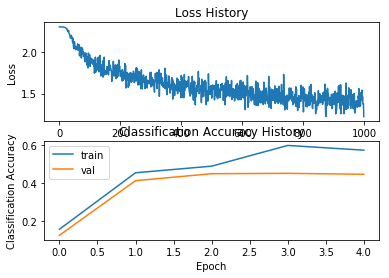



Training process took 29.863958s.
hs 200 lr 1.000000e-03 reg 2.500000e-01


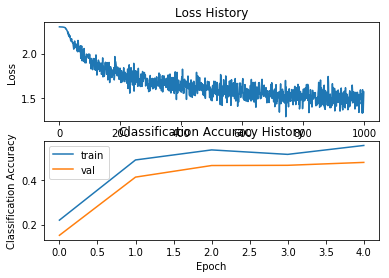



Training process took 30.200805s.
hs 200 lr 1.000000e-03 reg 5.000000e-01


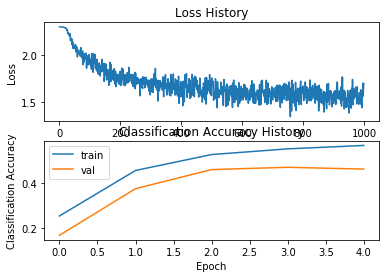



Training process took 30.708304s.
hs 200 lr 5.000000e-03 reg 1.000000e-05


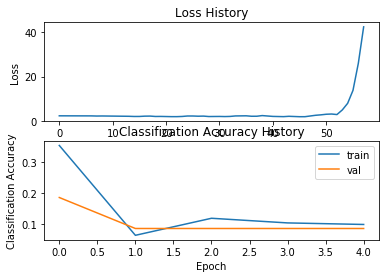



Training process took 29.031698s.
hs 200 lr 5.000000e-03 reg 1.000000e-04


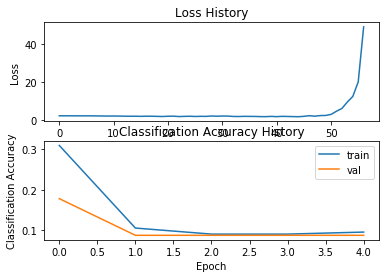



Training process took 29.161572s.
hs 200 lr 5.000000e-03 reg 5.000000e-04


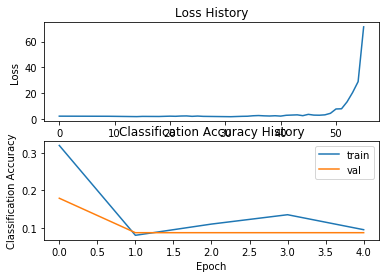



Training process took 30.249976s.
hs 200 lr 5.000000e-03 reg 1.000000e-03


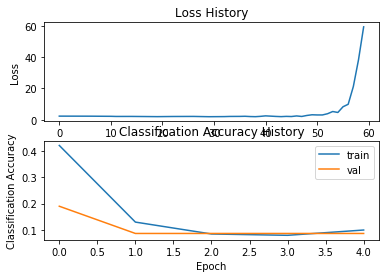



Training process took 33.546110s.
hs 200 lr 5.000000e-03 reg 5.000000e-03


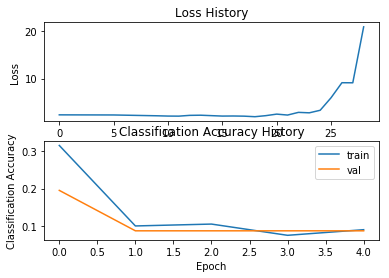



Training process took 29.568531s.
hs 200 lr 5.000000e-03 reg 1.000000e-02


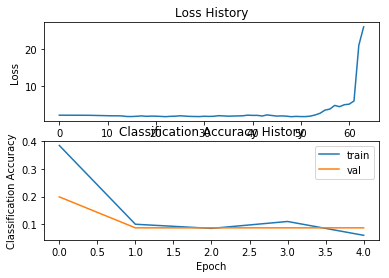



Training process took 29.619834s.
hs 200 lr 5.000000e-03 reg 2.500000e-01


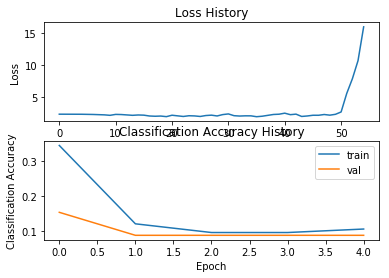



Training process took 29.502345s.
hs 200 lr 5.000000e-03 reg 5.000000e-01


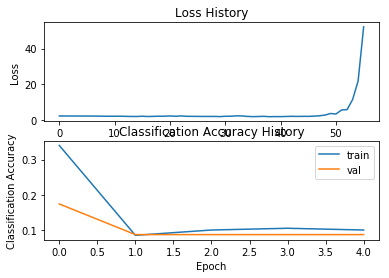



Training process took 155.159782s.
hs 300 lr 2.000000e-04 reg 1.000000e-05


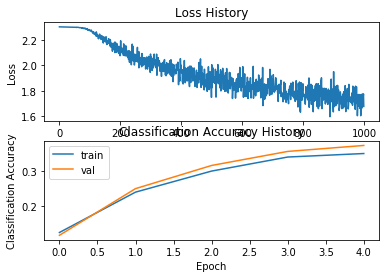



Training process took 183.085321s.
hs 300 lr 2.000000e-04 reg 1.000000e-04


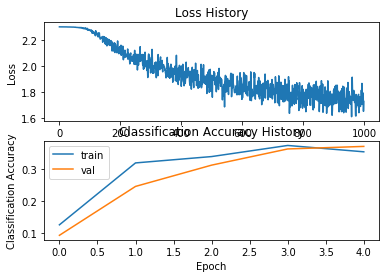



Training process took 186.556476s.
hs 300 lr 2.000000e-04 reg 5.000000e-04


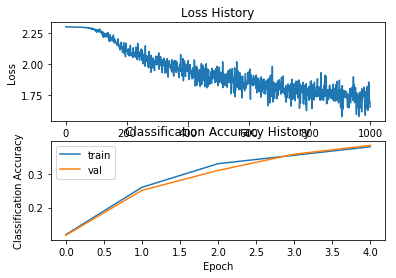



Training process took 194.361570s.
hs 300 lr 2.000000e-04 reg 1.000000e-03


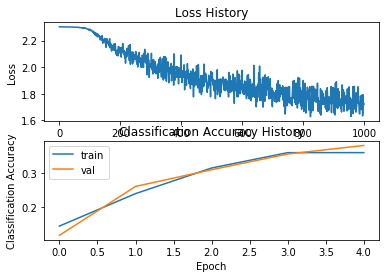



Training process took 224.609702s.
hs 300 lr 2.000000e-04 reg 5.000000e-03


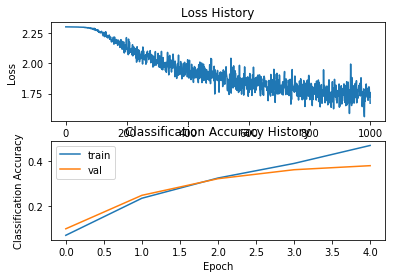



Training process took 182.991329s.
hs 300 lr 2.000000e-04 reg 1.000000e-02


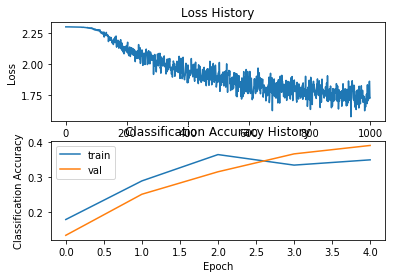



Training process took 2188.205483s.
hs 300 lr 2.000000e-04 reg 2.500000e-01


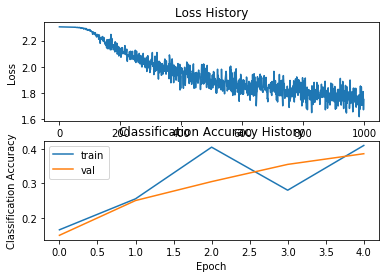



Training process took 44.201654s.
hs 300 lr 2.000000e-04 reg 5.000000e-01


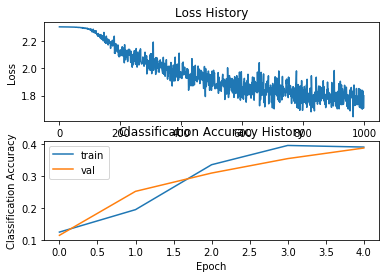



Training process took 42.415694s.
hs 300 lr 5.000000e-04 reg 1.000000e-05


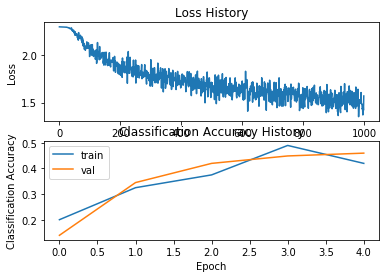



Training process took 44.267055s.
hs 300 lr 5.000000e-04 reg 1.000000e-04


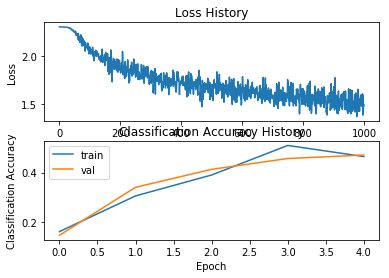



Training process took 43.588991s.
hs 300 lr 5.000000e-04 reg 5.000000e-04


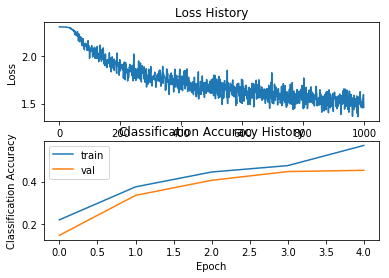



Training process took 43.278162s.
hs 300 lr 5.000000e-04 reg 1.000000e-03


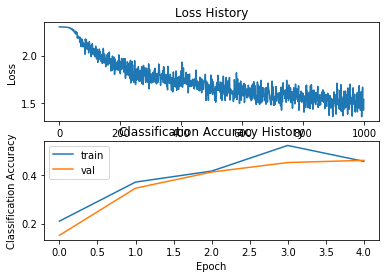



Training process took 45.588037s.
hs 300 lr 5.000000e-04 reg 5.000000e-03


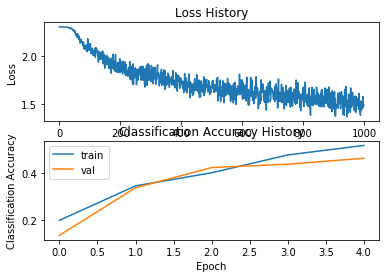



Training process took 44.014454s.
hs 300 lr 5.000000e-04 reg 1.000000e-02


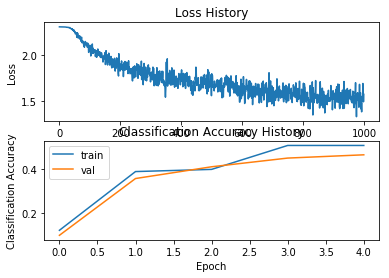



Training process took 46.035274s.
hs 300 lr 5.000000e-04 reg 2.500000e-01


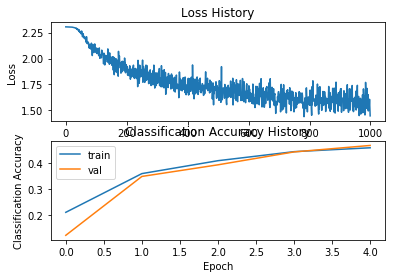



Training process took 44.599488s.
hs 300 lr 5.000000e-04 reg 5.000000e-01


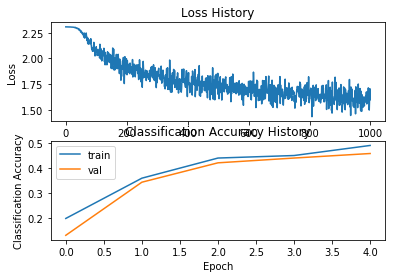



Training process took 44.714152s.
hs 300 lr 1.000000e-03 reg 1.000000e-05


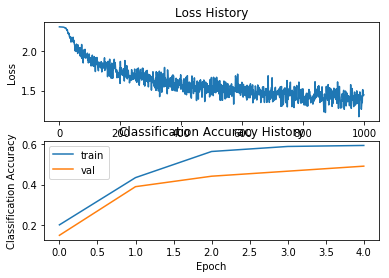



Training process took 59.139140s.
hs 300 lr 1.000000e-03 reg 1.000000e-04


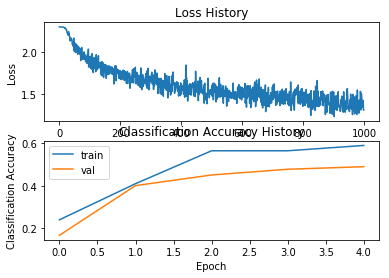



Training process took 198.295688s.
hs 300 lr 1.000000e-03 reg 5.000000e-04


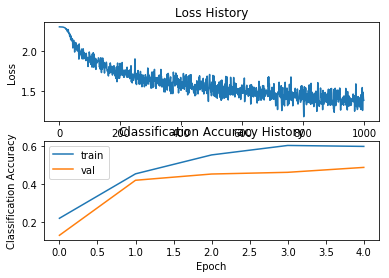



Training process took 186.569834s.
hs 300 lr 1.000000e-03 reg 1.000000e-03


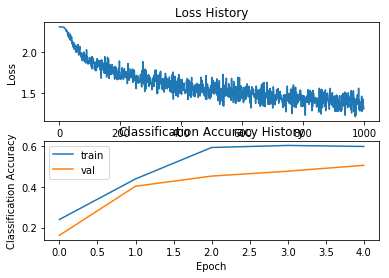



Training process took 213.062922s.
hs 300 lr 1.000000e-03 reg 5.000000e-03


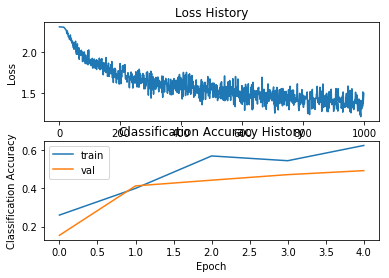



Training process took 192.189489s.
hs 300 lr 1.000000e-03 reg 1.000000e-02


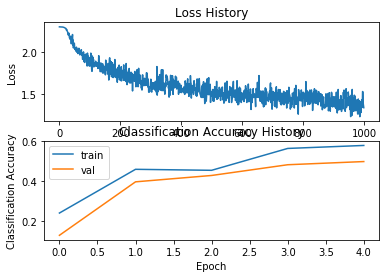



Training process took 186.323976s.
hs 300 lr 1.000000e-03 reg 2.500000e-01


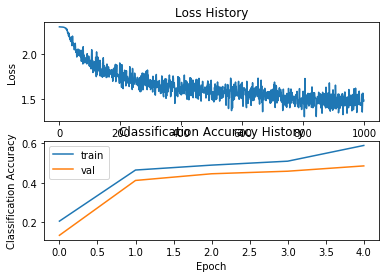



Training process took 186.639519s.
hs 300 lr 1.000000e-03 reg 5.000000e-01


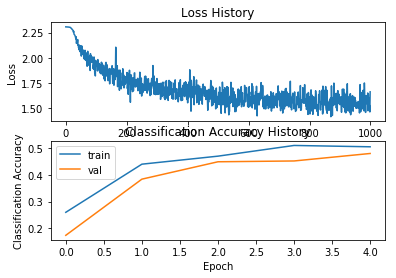



Training process took 2337.523590s.
hs 300 lr 5.000000e-03 reg 1.000000e-05


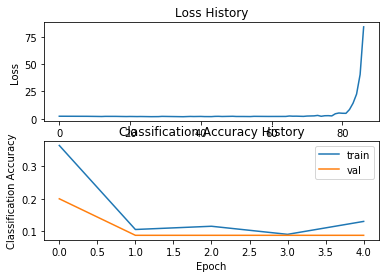



Training process took 41.945456s.
hs 300 lr 5.000000e-03 reg 1.000000e-04


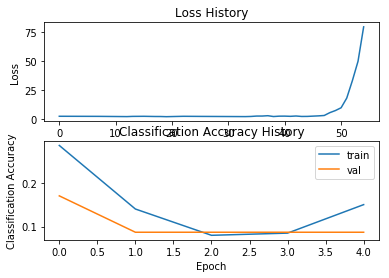



Training process took 39.043018s.
hs 300 lr 5.000000e-03 reg 5.000000e-04


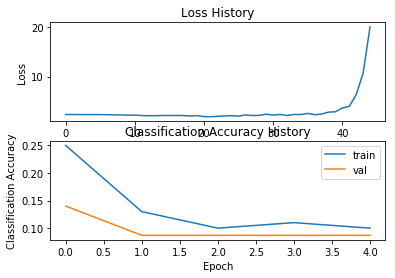



Training process took 40.936658s.
hs 300 lr 5.000000e-03 reg 1.000000e-03


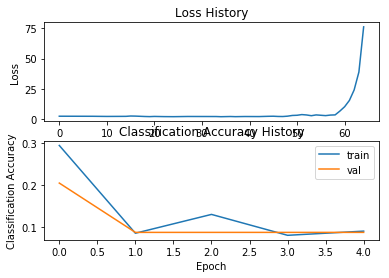



Training process took 39.625875s.
hs 300 lr 5.000000e-03 reg 5.000000e-03


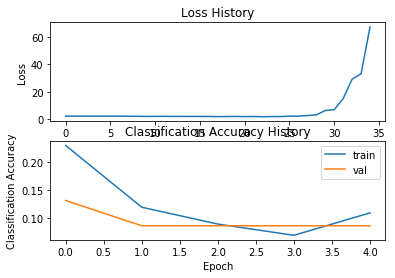



Training process took 40.177271s.
hs 300 lr 5.000000e-03 reg 1.000000e-02


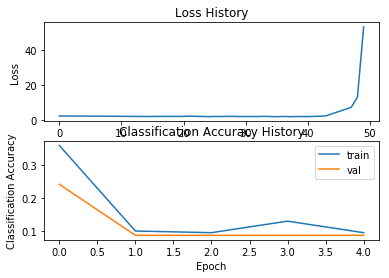



Training process took 41.646474s.
hs 300 lr 5.000000e-03 reg 2.500000e-01


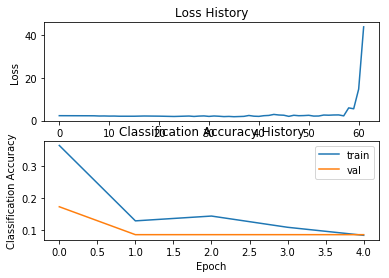



Training process took 40.806302s.
hs 300 lr 5.000000e-03 reg 5.000000e-01


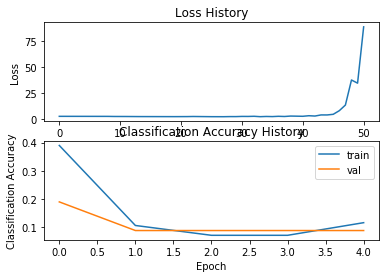



hs 50 lr 2.000000e-04 reg 1.000000e-05 train accuracy 0.369857 val accuracy 0.381000
hs 50 lr 2.000000e-04 reg 1.000000e-04 train accuracy 0.371041 val accuracy 0.373000
hs 50 lr 2.000000e-04 reg 5.000000e-04 train accuracy 0.367347 val accuracy 0.367000
hs 50 lr 2.000000e-04 reg 1.000000e-03 train accuracy 0.364898 val accuracy 0.369000
hs 50 lr 2.000000e-04 reg 5.000000e-03 train accuracy 0.368082 val accuracy 0.372000
hs 50 lr 2.000000e-04 reg 1.000000e-02 train accuracy 0.365347 val accuracy 0.377000
hs 50 lr 2.000000e-04 reg 2.500000e-01 train accuracy 0.365776 val accuracy 0.368000
hs 50 lr 2.000000e-04 reg 5.000000e-01 train accuracy 0.366776 val accuracy 0.366000
hs 50 lr 5.000000e-04 reg 1.000000e-05 train accuracy 0.455122 val accuracy 0.445000
hs 50 lr 5.000000e-04 reg 1.000000e-04 train accuracy 0.452000 val accuracy 0.443000
hs 50 lr 5.000000e-04 reg 5.000000e-04 train accuracy 0.452490 val accuracy 0.448000
hs 50 lr 5.000000e-04 reg 1.000000e-03 train accuracy 0.451755 

In [17]:
import time

best_net = None # store the best model into this 
best_val = -1 # store the best validation accuracy
results = {} # store the hyperparameter information

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
hidden_sizes = [50, 75, 100, 125, 150, 200, 300]
learning_rates = [2e-4, 5e-4, 1e-3]
regularization_strengths = [1e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 0.25, 0.5]

for i in range(len(hidden_sizes)):
    for j in range(len(learning_rates)):
        for k in range(len(regularization_strengths)):
            net = TwoLayerNet(input_size, hidden_sizes[i], num_classes)
            tic = time.time()
            stats = net.train(X_train, y_train, X_val, y_val, 
                              learning_rate=learning_rates[j], 
                              reg=regularization_strengths[k], 
                              num_iters=1000, batch_size=200)
            toc = time.time()
            training_accu = np.mean(net.predict(X_train) == y_train)
            validation_accu = np.mean(net.predict(X_val) == y_val)
            
            results[(hidden_sizes[i], 
                     learning_rates[j], 
                     regularization_strengths[k])] = (training_accu, 
                                                     validation_accu)
            
            if best_val < validation_accu:
                best_val = validation_accu
                best_net = net
            
            print('Training process took %fs.' % (toc - tic))
            print("hs %d lr %e reg %e" % (hidden_sizes[i], learning_rates[j], 
                                          regularization_strengths[k]))
            
            plt.subplot(2, 1, 1)
            plt.plot(stats['loss_history'])
            plt.title('Loss History')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            
            plt.subplot(2, 1, 2)
            plt.plot(stats['train_acc_history'], label='train')
            plt.plot(stats['val_acc_history'], label='val')
            plt.title('Classification Accuracy History')
            plt.xlabel('Epoch')
            plt.ylabel('Classification Accuracy')
            plt.legend()
            plt.show()
            
            print()
            print()
            
for hs, lr, reg in sorted(results):
    training_accuracy, validation_accuracy = results[(hs, lr, reg)]
    print('hs %d lr %e reg %e train accuracy %f val accuracy %f' % (
          hs, lr, reg, training_accuracy, validation_accuracy))

print('Best validation accuracy achieved during cross-validation: %f' % best_val)
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

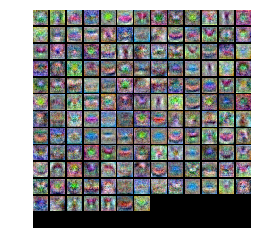

In [18]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [19]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.491


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer:* 1, 3

*Your explanation:*

- 1 is true. One of the reasons that the testing accuracy is lower than the training accuracy is that some images in certain classes appearing in the testing data are not covered by the training data. Therefore, enlarging the training dataset makes the classifier more generalized, decreasing this gap by increasing the testing accuracy.
- 2 is false. Adding more hidden units increases the model capacity, which in turn increases the training accuracy, making the model even more overfitting. 
- 3 is true. Big gap between testing accuracy and training accuracy represents that the model is overfitting. In other words, model parameters acquired from training are too complex to fit the testing data. As we generally want the model to be simple, it is reasonable to penalize the model complexity, i.e., increasing the regularization strength.